# Regression 

In [1]:



from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import sys

import matplotlib.pyplot as plt
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
Pandas 1.3.5
Scikit-Learn 1.1.1
GPU is available


In [2]:
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Set random seed
np.random.seed(0)

# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Divide our data into training and test sets



In [3]:
features

array([[ 1.29876053, -0.09037128, -0.70380582],
       [-0.47120835, -0.43288143, -0.06250804],
       [-0.65258817,  2.00808597, -1.09589096],
       ...,
       [ 1.02504134, -2.02531562, -0.21716545],
       [ 0.682429  , -0.87764821, -0.98026165],
       [-1.37701857,  2.01124319, -0.23550331]])

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
        features, target, random_state=61)
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, y_train_full, random_state=61)

In [6]:
print(X_test.shape)
print(y_test.shape)
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train.shape)
print(X_train.shape[1:])
print(X_valid.shape)

(2500, 3)
(2500,)
(7500, 3)
(7500,)
(5625, 3)
(3,)
(1875, 3)


In [7]:

# Start neural network
network = models.Sequential()

# input shape is 3 features
# activation = rectified linear unit  ReLU=max (0,z) sum weighted
# fully connected by using 12 nodes  hiden layers

#  https://keras.io/api/layers/core_layers/
# -------------- ReLU ------
# Binary classification:
# One unit with a sigmoid activation function.
# Multiclass classification:
# k units (where k is the number of target classes) and a softmax activation func‐ tion.
# Regression:
# One unit with no activation function.
# ----------------

# ------- loss function -------
# Binary classification:      Binary cross-entropy.
# Multiclass classification:  Categorical cross-entropy.
# Regression:                 Mean square error.
# ------------------


# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=256,  # 32 
                         activation="relu",
                         input_shape=(X_train.shape[1],))) # flatten features

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=128, activation="relu"))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))  # Regression: One unit with no activation function.


# Compile neural network
network.compile(loss="mse", # Mean squared error for regression
                optimizer="RMSprop", # Optimization algorithm
                metrics=["mse"]) # Mean squared error

print(network.summary())

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________
None


2022-12-06 12:23:36.673377: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 12:23:36.674211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
# Train neural network
history = network.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=10, # Number of epochs
                      verbose=0, # No output
                      batch_size=128, # Number of observations per batch (100)
                      validation_data=(X_valid, y_valid)) # validation data



2022-12-06 12:23:37.424836: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-06 12:23:37.427718: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [ ]:
# Predict classes of test set
predicted_target = network.predict(X_test)

print(y_test)
print(predicted_target)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [30]:
scores = network.evaluate(X_train, y_train)
scores

176/176 [==============================] - 0s 3ms/step - loss: 3.6483 - mse: 3.6483


[3.6482865810394287, 3.6482865810394287]

In [31]:
scores = network.evaluate(X_valid, y_valid)
scores

59/59 [==============================] - 0s 3ms/step - loss: 3.6412 - mse: 3.6412


[3.6412439346313477, 3.6412439346313477]

In [32]:
scores = network.evaluate(X_train, y_train)
print("Training MSE: %.2f\n" % (scores[1]))

scores = network.evaluate(X_test, y_test)
print("Testing MSE: %.2f\n" % (scores[1]))

scores = network.evaluate(X_valid, y_valid)
print("Testing MSE: %.2f\n" % (scores[1]))

176/176 [==============================] - 0s 3ms/step - loss: 3.6483 - mse: 3.6483
Training MSE: 3.65

79/79 [==============================] - 0s 3ms/step - loss: 3.5712 - mse: 3.5712
Testing MSE: 3.57

59/59 [==============================] - 0s 3ms/step - loss: 3.6412 - mse: 3.6412
Testing MSE: 3.64



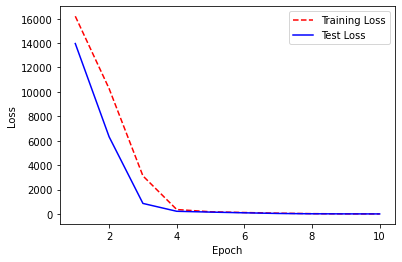

In [33]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();